# Product and Category Analysis

## Description
This notebook contains an analysis of the sales data focusing on product and category popularity.

## 1. Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## 2. Load Data

In [20]:
df = pd.read_csv('../data/sales-06-07-24.csv')

In [21]:
df.head()

,Invoice Number,Date Sale,Time Sale,Product,Category,Quantity,Unit Price,Total Sale,Payment Method,Seller,Discounts,Taxes,Notes,Remaining Stock
0,6497-964,2024-07-13,17:52:23,Juice,Drinks,5,8.02,40.10,Credit Card,Anna,0.76,7.22,Regular Client,28
1,3930-318,2024-07-03,02:54:23,Camel,Cigarettes,10,16.70,167.00,Cash,Charles,11.01,30.06,Regular Client,95
2,2937-511,2024-07-03,15:14:23,Water,Drinks,9,17.23,155.07,Debit,Anna,1.59,27.91,NaN,41
3,1257-910,2024-07-09,16:52:23,Lucky Strike,Cigarettes,10,5.78,57.80,Credit Card,John,4.90,10.40,NaN,30
4,7596-465,2024-06-26,00:55:23,Magazine,Others,5,2.57,12.85,Credit Card,Anna,0.50,2.31,NaN,73


In [47]:
df.columns

Index(['Invoice Number', 'Date Sale', 'Time Sale', 'Product', 'Category',
       'Quantity', 'Unit Price', 'Total Sale', 'Payment Method', 'Seller',
       'Discounts', 'Taxes', 'Notes', 'Remaining Stock'],
      dtype='object')

## 3. Clean and Prepare Data

In [25]:
df.isnull().sum()

Invoice Number       0
Date Sale            0
Time Sale            0
Product              0
Category             0
Quantity             0
Unit Price           0
Total Sale           0
Payment Method       0
Seller               0
Discounts            0
Taxes                0
Notes              507
Remaining Stock      0
dtype: int64

In [26]:
df.dtypes

Invoice Number      object
Date Sale           object
Time Sale           object
Product             object
Category            object
Quantity             int64
Unit Price         float64
Total Sale         float64
Payment Method      object
Seller              object
Discounts          float64
Taxes              float64
Notes               object
Remaining Stock      int64
dtype: object

In [27]:
df.columns = df.columns.str.strip()

In [46]:
df.columns

Index(['Invoice Number', 'Date Sale', 'Time Sale', 'Product', 'Category',
       'Quantity', 'Unit Price', 'Total Sale', 'Payment Method', 'Seller',
       'Discounts', 'Taxes', 'Notes', 'Remaining Stock'],
      dtype='object')

In [29]:
df.describe

<bound method NDFrame.describe of     Invoice Number   Date Sale Time Sale       Product    Category  Quantity  \
0         6497-964  2024-07-13  17:52:23         Juice      Drinks         5   
1         3930-318  2024-07-03  02:54:23         Camel  Cigarettes        10   
2         2937-511  2024-07-03  15:14:23         Water      Drinks         9   
3         1257-910  2024-07-09  16:52:23  Lucky Strike  Cigarettes        10   
4         7596-465  2024-06-26  00:55:23      Magazine      Others         5   
..             ...         ...       ...           ...         ...       ...   
995       2114-833  2024-07-16  17:27:23  Toilet Paper      Others         8   
996       3814-222  2024-07-19  04:26:23      Marlboro  Cigarettes         8   
997       4440-401  2024-07-11  02:20:23       Cookies     Candies         2   
998       3125-727  2024-06-26  12:29:23         Juice      Drinks         8   
999       4347-118  2024-06-23  00:36:23       Candies     Candies         2   

     

## 4. Descriptive Analysis

### 4.1 Total Sales by Product

In [18]:
total_sales_by_product = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

In [19]:
total_sales_by_product

Product
Lucky Strike         569
Camel                444
Water                443
Magazine             418
Marlboro             406
Chocolate            397
Toilet Paper         391
Cookies              378
Cigarette Lighter    364
Soda                 340
Juice                334
Beer                 320
Chewing gums         319
Candies              307
Name: Quantity, dtype: int64

### 4.2 Total Sales by Category

In [20]:
total_sales_by_category = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

In [21]:
total_sales_by_category

Category
Drinks        1437
Cigarettes    1419
Candies       1401
Others        1173
Name: Quantity, dtype: int64

## 5. Data Visualization

### 5.1 Total Sales by Product

In [23]:
sns.set(style="whitegrid")

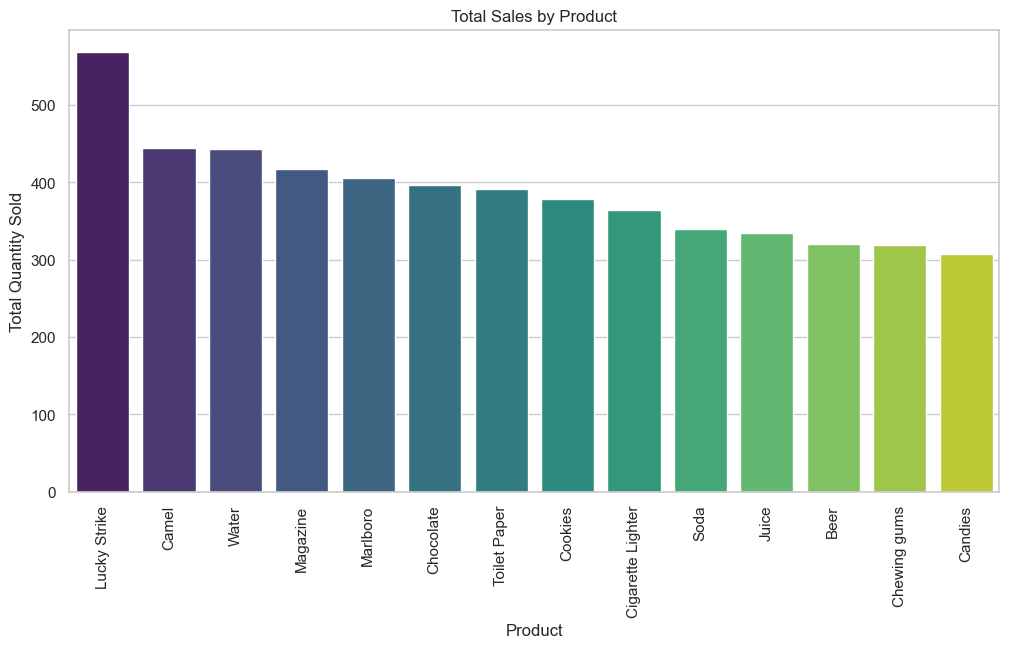

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_by_product.index, y=total_sales_by_product.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.show()

### 5.2 Total Sales by Category

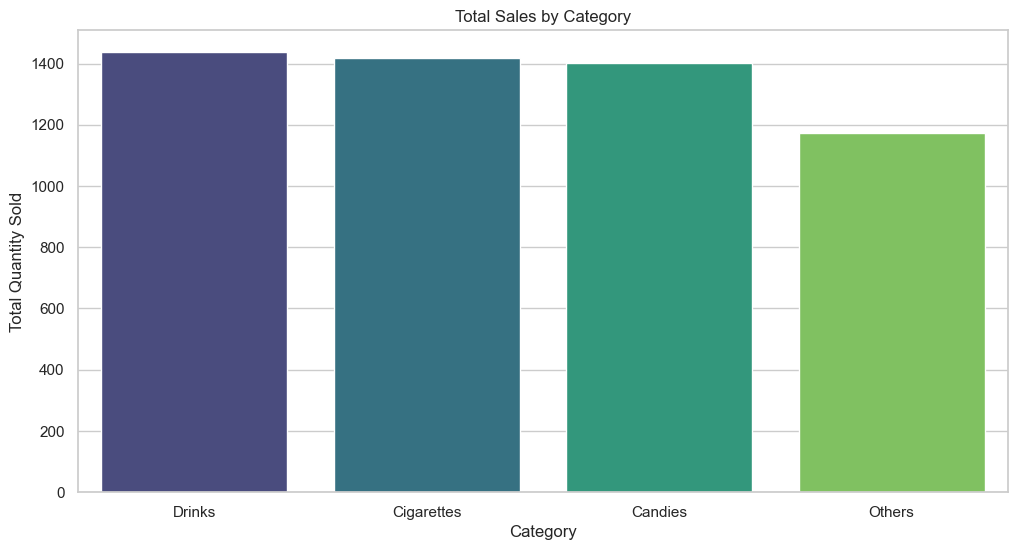

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_by_category.index, y=total_sales_by_category.values, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()

## 6. Linear Regression Analysis

### 6.1 Prepare Data for Regression

In [30]:
regression_df = df[['Quantity', 'Unit Price']]

In [32]:
regression_df = regression_df[(regression_df['Unit Price'] > 0) & (regression_df['Quantity'] > 0)]

In [34]:
X = regression_df[['Unit Price']]
y = regression_df['Quantity']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6.2 Perform Regression

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [51]:
f"Mean Squared Error: {mse}"

'Mean Squared Error: 7.992390141244711'

In [52]:
f"R^2 Score: {r2}"

'R^2 Score: -0.04043533444349934'

### 6.3 Visualize Regression Results

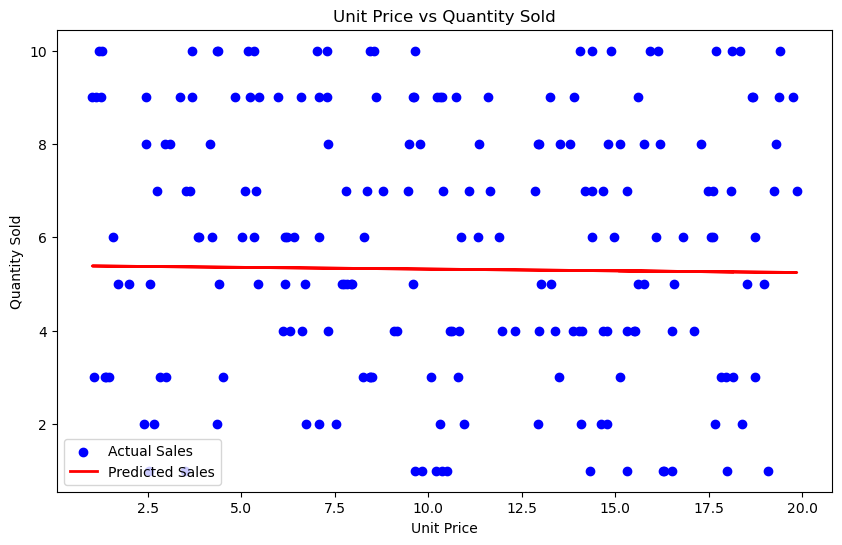

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Sales')
plt.title('Unit Price vs Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

## 7. Conclusions and Results

### Sales Analysis by Category

The "Total Sales by Category" chart shows the following observations:

1. **Drinks**: This category is the top seller with a total quantity of approximately 1400 units. This suggests that drinks are a crucial part of the inventory and represent a significant portion of the kiosk's sales.

2. **Cigarettes**: With a total sales quantity similar to drinks, cigarettes are also among the top-selling products, indicating high demand.

3. **Candies**: This category also shows a good sales volume, slightly below drinks and cigarettes.

4. **Others**: Although this category is the least sold compared to the other three, it still shows a significant sales volume.

### Sales Analysis by Product

The "Total Sales by Product" chart provides a detailed analysis of individual products within the categories:

1. **Lucky Strike**: This product is the top seller with a total quantity of over 500 units. This suggests that Lucky Strike cigarettes are extremely popular among kiosk customers.

2. **Camel and Water**: These products also have high sales, close to 400 units each, indicating their popularity.

3. **Magazine and Marlboro**: These products follow in popularity with significant sales volumes.

4. **Other Products**: Products such as chocolate, toilet paper, cookies, cigarette lighters, soda, juice, beer, chewing gums, and other candies also show notable sales, although in smaller quantities compared to the leading products.

### Linear Regression Analysis

The objective of the linear regression analysis was to understand how the unit price affects the quantity sold of the products.

In this graph, the blue dots represent the actual sales (quantity sold versus unit price), and the red line shows the relationship predicted by the linear regression model.

Interpretation of the Graph:

- General Trend: The regression line is almost horizontal, suggesting that there is no significant relationship between unit price and quantity sold. In other words, changes in unit price do not seem to have a considerable impact on the quantity of products sold.

- Data Distribution: The dispersion of the blue dots indicates that the quantity sold varies widely for different unit prices, reinforcing the conclusion that price is not a determining factor for sales in this specific case.

- Coefficient of Determination (R²): If we check the coefficient of determination (R²), we likely find a very low value, confirming that the linear regression model does not well explain the variability in quantity sold based on unit price.


## 8. Recommendations

1. **Inventory Management**:
   - **Increase stock levels** of drinks and cigarettes, especially popular brands like Lucky Strike and Camel, to avoid stockouts and maximize sales.
   - **Optimize inventory** of less sold products to reduce storage costs and ensure proper product rotation.

2. **Marketing Strategies**:
   - **Promotions**: Implement promotions or discounts on categories and products with lower sales to increase demand.
   - **Bundled Offers**: Create bundled offers with popular products to boost sales of less sold items.

3. **Product Selection**:
   - **Introduce new products** in popular categories like drinks and candies to attract more customers and maintain interest.
   - **Evaluate the performance** of low-selling products and consider replacing them with more in-demand alternatives.

4. **Pricing Strategies**: Since unit price does not seem to significantly influence the quantity sold, we could focus on other pricing strategies, such as volume discounts, to boost sales.

5. **Other Factors**: Consider other factors that might be influencing sales, such as product placement within the store, special promotions, or competition. Additional analysis might be necessary to identify these factors.

6. **Further Analysis:** It would be useful to conduct more analysis to see if there are subgroups of products or categories where price could have a different impact. More complex regression models or multivariate analysis could also be considered.